In [1]:
#Supervised ML
#-regression -- simple linear regression-->formula:(Y = bX + a)

#Project 1 - Goal is to design a model that can predict marks
#if given number of hours are given

import numpy as np
import pandas as pd
import matplotlib.pyplot as mat

**🟢Data Gathering**

In [2]:
#stage 1
data = pd.read_csv("https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv")
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


**🟢EDA**

In [24]:
#stage 2
a = data.shape     #display shape (col,row)
b = data.columns   #displays columns
c = data.info()    #display short summary

print('\n\n',a,'\n\n',b,'\n\n',c)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


 (9, 4) 

 Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object') 

 None


In [8]:
data.columns   #displays columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [10]:
data.info()    #display short summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


In [35]:
#normalization
# it is used to change value of numeric column
# in dataset to common scale[0-1]




In [ ]:
#stage 3 : Data Preparation

#check missing values
#check duplictae values
#convert non numeric to numeric
#normalization
#select independent and dependent var

In [25]:
data.isnull().sum()

Hours_Studied    0
Test_Grade       0
Status           0
Result           0
dtype: int64

In [27]:
#True = duplicate values
#False = No Duplicate values
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [36]:
#convert non numeric to numeric
# used in categorical data

data.Status = a.fit_transform(data.Status)   #updating existing column using fit_transform
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [39]:
# Normalization ------------
#used for better accuracy of result
arr = data.Test_Grade.values
print(arr)

normalize_value = sk.normalize([arr])
print(normalize_value)


[ 57  66  73  76  79  81  90  96 100]
[[0.23500809 0.27211463 0.30097527 0.31334412 0.32571297 0.33395887
  0.37106541 0.3958031  0.4122949 ]]


In [41]:
# Normalizaton using MinMax()-----------
arr = data.Test_Grade.values
print(arr)

nrmlz = sk.MinMaxScaler()
normalize_value = nrmlz.fit_transform([arr])

print(normalize_value)

[ 57  66  73  76  79  81  90  96 100]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [47]:
x = data.Hours_Studied.values
print(x)

x = x.reshape(9,1)    #when there is single independent variable convert it to 2d
x.shape

[ 2  3  4  5  6  7  8  9 10]


(9, 1)

In [48]:
y = data.Test_Grade.values
y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# Stage 4 : Model Building[Pply suitable ML algo on dataset]
#supervised : Regression [SLR]
# y=mX+c
# y = predicted value
# m = slope/coefficient
# x = Independent var
# c = intercept


In [49]:
import sklearn.linear_model as lm
lreg = lm.LinearRegression()

In [50]:
lreg.fit(x,y)

LinearRegression()

In [53]:
# Satge 5 : Evaluation

data['Predicted val'] = lreg.predict(x)
data

,Hours_Studied,Test_Grade,Status,Result,Predicted val
0,2,57,0,D,59.711111
1,3,66,0,D,64.727778
2,4,73,1,C,69.744444
3,5,76,1,C,74.761111
4,6,79,1,C,79.777778
5,7,81,1,B,84.794444
6,8,90,1,B,89.811111
7,9,96,1,A,94.827778
8,10,100,1,A,99.844444


In [58]:
predicted_val = lreg.predict(x)
print(predicted_val)

[59.71111111 64.72777778 69.74444444 74.76111111 79.77777778 84.79444444
 89.81111111 94.82777778 99.84444444]


In [60]:
from sklearn.metrics import r2_score

acc = r2_score(y,predicted_val)
print(acc*100)  # accuracy of prediction is 97%

97.57431074095348


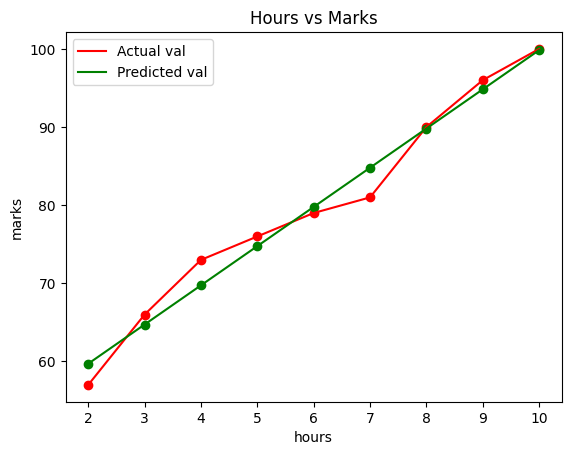

In [62]:
mat.plot(x,y,color='red',label='Actual val')
mat.scatter(x,y,color='red')

mat.plot(x,predicted_val,color='green',label='Predicted val')
mat.scatter(x,predicted_val,color='green')
mat.title('Hours vs Marks')
mat.xlabel('hours')
mat.ylabel('marks')
mat.legend()
mat.show()

In [66]:
#stage 6 : Predictions

hrs = float(input('How many hours studied in a day'))
if hrs>=1 and hrs<=10:
  marks = lreg.predict([[(hrs)]])
  print('You can score:',marks,'marks')
else:
    print('Impossible')

How many hours studied in a day24
Impossible
